# NHANES Hybrid approach of 5 Random Forest models passed into an ANN model using SMOTE technique.

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Set directory path
import os
os.chdir("/content/drive/My Drive/COMP-5800-YDK-2020_Group1")

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np

In [4]:
import keras
import tensorflow as tf
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras.layers.normalization import BatchNormalization

In [5]:
demoData = pd.read_csv('ImputedDataset/DemographicsData.csv')
dietData = pd.read_csv('ImputedDataset/DietaryData.csv')
examData = pd.read_csv('ImputedDataset/ExaminationData.csv')
labData = pd.read_csv('ImputedDataset/LaboratoryData.csv')
hypertensionData = pd.read_csv('ImputedDataset/HypertensionData.csv')

In [6]:
demoData.drop('SEQN', axis=1, inplace = True)
dietData.drop('SEQN', axis=1, inplace = True)
examData.drop('SEQN', axis=1, inplace = True)
labData.drop('SEQN', axis=1, inplace = True)
hypertensionData.drop('SEQN', axis=1, inplace = True)

In [7]:
demoData.shape

(8366, 29)

In [8]:
dietData.shape

(8366, 43)

In [9]:
examData.shape

(8366, 137)

In [10]:
labData.shape

(8366, 189)

In [11]:
hypertensionData.shape

(8366, 665)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
y = hypertensionData['Target']

## Train Test split after oversampling the data using SMOTE

In [14]:
oversample = SMOTE(random_state = 42)

In [15]:
demoX_train, demoX_test, demoY_train, demoY_test = train_test_split(demoData, y, test_size=0.33, random_state=42)

In [16]:
demoX_train, demoY_train = oversample.fit_resample(demoX_train, demoY_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [17]:
demoX_train = pd.DataFrame(demoX_train)

In [18]:
demoX_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,10.0,2.0,1.000000,80.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.0,2.0,1.000000,2.0,2.0,3.000000,1.000000,5.397605e-79,5.397605e-79,2.000000e+00,1.000000,4.000000,1.000000,2.000000,8577.381557,10416.300411,1.000000,134.000000,99.000000,99.000000
1,10.0,2.0,2.000000,41.000000,4.000000,4.000000,1.000000,1.000000,1.000000,2.0,2.0,1.000000,2.0,2.0,2.000000,2.000000,5.397605e-79,1.000000e+00,5.397605e-79,2.000000,3.000000,2.000000,2.000000,20400.322927,21250.863885,2.000000,142.000000,6.000000,6.000000
2,10.0,2.0,1.000000,43.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.0,2.0,2.000000,2.0,2.0,1.000000,1.000000,5.397605e-79,5.397605e-79,5.397605e-79,1.000000,3.000000,1.000000,2.000000,24113.349373,24900.237591,2.000000,147.000000,6.000000,6.000000
3,10.0,2.0,2.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,2.0,1.000000,2.0,2.0,2.000000,2.000000,5.397605e-79,1.000000e+00,5.397605e-79,2.000000,2.000000,2.000000,1.000000,15816.779215,16144.481203,2.000000,137.000000,4.000000,4.000000
4,10.0,2.0,1.000000,52.000000,5.000000,7.000000,1.000000,1.000000,1.000000,2.0,2.0,1.000000,2.0,2.0,3.000000,3.000000,5.397605e-79,5.397605e-79,5.397605e-79,1.000000,2.000000,2.000000,1.000000,19418.875074,21988.973260,1.000000,137.000000,10.000000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111,10.0,2.0,1.000000,63.506101,3.499128,3.998838,2.000000,1.500291,1.500291,2.0,2.0,1.000000,2.0,2.0,4.500872,4.500872,5.397605e-79,5.002905e-01,2.000000e+00,1.000000,3.500291,1.499709,1.499709,13727.781941,16132.912057,1.000000,142.497385,8.499709,8.499709
9112,10.0,2.0,1.000000,45.112042,3.584844,3.584844,1.000000,1.000000,1.000000,2.0,2.0,1.000000,2.0,2.0,2.830311,2.830311,5.397605e-79,8.303114e-01,5.397605e-79,1.415156,2.584844,3.000000,1.000000,31841.339538,30966.246948,1.415156,144.263599,10.018132,10.018132
9113,10.0,2.0,1.830797,64.984782,1.507609,1.507609,1.000000,1.000000,1.830797,2.0,2.0,1.830797,2.0,2.0,1.830797,1.830797,5.397605e-79,5.397605e-79,1.830797e+00,1.000000,4.000000,1.169203,1.169203,9418.704125,9583.519941,1.830797,141.492391,10.646376,10.646376
9114,10.0,2.0,1.000000,70.000000,4.812473,6.437418,1.000000,1.000000,1.000000,2.0,2.0,1.000000,2.0,2.0,1.812473,1.812473,5.397605e-79,5.397605e-79,1.812473e+00,1.812473,4.000000,2.000000,1.187527,7756.695106,8228.291916,1.812473,140.500218,4.812473,4.812473


In [19]:
dietX_train, dietX_test, dietY_train, dietY_test = train_test_split(dietData, y, test_size=0.33, random_state=42)

In [20]:
dietX_train, dietY_train = oversample.fit_resample(dietX_train, dietY_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [21]:
dietX_train = pd.DataFrame(dietX_train)

In [22]:
dietX_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,5.397605e-79,5.397605e-79,2.0,2.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.397605e-79,5.397605e-79,2.0,2.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.397605e-79,5.397605e-79,2.0,2.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.397605e-79,5.397605e-79,2.0,2.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.000000e+00,5.397605e-79,1.0,2.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,17.000000,0.0,19.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,28.0,0.0,31.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111,2.499128e+00,5.397605e-79,1.0,2.000000,0.0,0.000000,0.00000,13.000000,14.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9112,1.000000e+00,5.397605e-79,1.0,2.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,16.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9113,3.169203e+00,5.397605e-79,1.0,2.000000,0.0,0.000000,0.00000,0.000000,14.000000,0.0,2.707249,0.000000,18.0,0.0,0.0,0.000000,0.0,0.0,24.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9114,1.000000e+00,5.397605e-79,1.0,2.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,24.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
examX_train, examX_test, examY_train, examY_test = train_test_split(examData, y, test_size=0.33, random_state=42)

In [24]:
examX_train, examY_train = oversample.fit_resample(examX_train, examY_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [25]:
examX_train = pd.DataFrame(examX_train)

In [26]:
examX_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136
0,74.000000,1.000000,1.000000,65.700000,1.0,1.0,1.0,5.00000,6.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,6.000000,5.000000,1.000000,2.000000,3.00000,3.0,4.000000,3.000000,3.0,10.0,15.0,5.0,3.0,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,70.000000,1.000000,1.000000,124.900000,1.0,1.0,1.0,2.00000,3.000000,11.000000,4.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,4.000000,11.000000,3.000000,2.000000,2.000000,3.000000,11.00000,11.0,11.000000,11.000000,11.0,10.0,11.0,11.0,11.0,11.000000,3.000000,2.000000,36.000000,42.000000,0.000000,56.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,72.000000,1.000000,1.000000,86.800000,1.0,1.0,1.0,8.00000,9.000000,11.000000,11.000000,4.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,4.000000,8.000000,12.000000,9.000000,11.00000,11.0,11.000000,11.000000,11.0,10.0,11.0,11.0,11.0,11.000000,9.000000,8.000000,0.000000,0.000000,0.000000,0.000000,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,86.000000,1.000000,1.000000,68.600000,1.0,1.0,1.0,8.00000,9.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,9.000000,9.000000,8.000000,9.000000,11.00000,11.0,11.000000,11.000000,11.0,10.0,11.0,11.0,11.0,11.000000,9.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0
4,90.000000,1.000000,1.000000,98.600000,1.0,1.0,1.0,2.00000,2.000000,11.000000,11.000000,11.000000,11.000000,4.000000,4.000000,11.000000,11.000000,4.000000,11.000000,3.000000,1.000000,8.000000,2.000000,11.00000,11.0,11.000000,11.000000,11.0,10.0,11.0,11.0,11.0,11.000000,3.000000,2.000000,36.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111,68.992447,1.000000,1.000000,66.200523,1.0,1.0,1.0,2.00000,3.000000,7.497966,11.000000,11.000000,7.502034,7.502034,7.502034,7.002324,7.002324,11.000000,7.497966,3.000000,4.502034,2.000000,2.500291,4.00000,11.0,6.497385,11.000000,11.0,10.0,11.0,11.0,11.0,4.000000,2.500291,4.502034,63.500872,68.998257,20.511911,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9112,85.472802,1.584844,1.000000,121.794886,1.0,1.0,1.0,3.90609,5.490934,6.906090,6.906090,12.754533,12.754533,12.754533,13.339377,13.339377,12.754533,4.000000,6.906090,4.906090,3.906090,4.490934,5.490934,6.90609,11.0,11.000000,11.000000,11.0,10.0,11.0,11.0,11.0,6.906090,5.490934,4.490934,0.000000,0.584844,0.584844,0.584844,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [27]:
labX_train, labX_test, labY_train, labY_test = train_test_split(labData, y, test_size=0.33, random_state=42)

In [28]:
labX_train, labY_train = oversample.fit_resample(labX_train, labY_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [29]:
labX_train = pd.DataFrame(labX_train)

In [30]:
labX_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188
0,28.400000,28.400000,5.397605e-79,115.000000,10166.000000,5.397605e-79,24.700000,48.000000,1.240000,168.000000,4.340000,0.290000,5.580000,1.000000,0.570000,9.670000,5.397605e-79,4.200000,26.800000,7.500000,63.900000,1.300000,0.700000,1.100000,0.300000,2.700000,0.100000,5.397605e-79,4.580000,14.100000,64.000000,94.300000,30.800000,32.700000,15.700000,131.000000,8.700000,1.000000e-01,259.000000,5.397605e-79,...,2.600000,26.000000,107.000000,5.940000,10.000000,5.397605e-79,52.000000,9.300000,165.000000,292.000000,3.800000,1.227000,4.100000,146.000000,0.200000,3.420000,5.397605e-79,9.000000,2.250000,168.000000,4.344000,6.500000,65.000000,257.000000,2.902000,5.100000,303.300000,95.000000,0.583000,113.400000,119.600000,1.027400,115.400000,85.600000,1.250400,73.200000,2.200000,0.626000,35.500000,5.397605e-79
1,6.100000,6.100000,5.397605e-79,147.000000,12994.800000,5.397605e-79,4.150000,79.000000,2.040000,145.000000,3.750000,0.290000,5.580000,1.000000,0.370000,6.280000,5.397605e-79,4.500000,36.200000,11.500000,49.500000,2.000000,0.900000,1.600000,0.500000,2.200000,0.100000,5.397605e-79,4.260000,11.600000,35.500000,83.200000,27.100000,32.500000,16.500000,361.000000,8.400000,1.000000e-01,0.442000,5.397605e-79,...,3.300000,33.000000,85.000000,4.720000,18.000000,5.397605e-79,42.000000,7.500000,188.000000,283.000000,3.300000,1.066000,4.100000,143.000000,0.200000,3.420000,5.397605e-79,8.800000,2.200000,143.000000,3.698000,6.800000,68.000000,66.000000,0.745000,4.200000,249.800000,80.000000,0.523000,153.000000,65.200000,0.663800,106.600000,78.600000,0.993400,79.800000,2.000000,0.984000,55.900000,5.397605e-79
2,13.700000,13.700000,5.397605e-79,131.000000,11580.400000,5.397605e-79,10.460000,38.000000,0.980000,189.000000,4.890000,0.290000,5.580000,1.000000,0.170000,2.880000,5.397605e-79,7.300000,36.200000,8.800000,52.600000,1.500000,1.100000,2.600000,0.600000,3.800000,0.100000,1.000000e-01,5.480000,14.700000,44.800000,81.900000,26.900000,32.800000,15.000000,362.000000,8.100000,5.397605e-79,0.035000,5.397605e-79,...,3.400000,34.000000,116.000000,6.440000,48.000000,5.397605e-79,101.000000,18.100000,121.000000,282.000000,3.300000,1.066000,4.700000,141.000000,0.500000,8.550000,5.397605e-79,9.200000,2.300000,191.000000,4.939000,7.500000,75.000000,121.000000,1.366000,5.800000,345.000000,111.000000,1.067000,104.000000,62.800000,0.852200,86.000000,78.400000,1.113000,78.800000,2.200000,0.696000,39.500000,5.397605e-79
3,4.200000,4.200000,5.397605e-79,67.000000,5922.800000,5.397605e-79,6.270000,46.000000,1.190000,148.000000,3.830000,0.318000,6.118000,0.800000,0.178000,3.020000,5.397605e-79,7.600000,36.300000,6.700000,49.700000,4.200000,3.200000,2.800000,0.500000,3.800000,0.300000,2.000000e-01,4.610000,13.600000,39.800000,86.200000,29.300000,34.000000,12.900000,342.000000,8.600000,5.397605e-79,0.038000,5.397605e-79,...,3.100000,31.000000,91.000000,5.050000,10.000000,5.397605e-79,56.000000,10.000000,162.000000,278.000000,4.200000,1.356000,4.300000,140.000000,0.100000,1.710000,5.397605e-79,9.400000,2.350000,149.000000,3.853000,7.300000,73.000000,100.000000,1.129000,3.300000,196.300000,407.000000,1.294200,162.400000,77.200000,1.162400,87.200000,148.800000,2.751600,53.800000,2.000000,0.728000,41.300000,5.397605e-79
4,144.800000,144.800000,5.397605e-79,250.000000,22100.000000,5.397605e-79,57.920000,49.000000,1.270000,206.000000,5.330000,0.290000,5.580000,1.000000,0.130000,2.210000,5.397605e-79,8.700000,35.200000,5.800000,48.000000,10.000000,1.100000,3.100000,0.500000,4.200000,0.900000,1.000000e-01,5.050000,15.500000,47.400000,93.900000,30.800000,32.800000,14.000000,404.000000,7.400000,1.000000e-01,0.017000,5.397605e-79,...,3.300000,33.000000,207.000000,11.490000,62.000000,5.397605e-79,112.00

In [31]:
medX_train, medX_test, Y_train, Y_test = train_test_split(hypertensionData.drop('Target', axis=1), y, 
                                                          test_size=0.33, random_state=42)

In [32]:
medX_train, Y_train = oversample.fit_resample(medX_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [33]:
medX_train = pd.DataFrame(medX_train)

In [34]:
medX_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1825.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111,1.0,730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9112,1.0,3650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.584844,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9113,1.0,5475.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.830797,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9114,1.0,2920.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.812473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.812473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature extraction of Demographics with Random Forest

In [35]:
rf_grid = RandomForestClassifier()

In [36]:
#############Hyperparameters to be tuned using random search###############

# Number of trees in random forest
n_estimators = [int(x) for x in range(20,100,10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [37]:
rf_random1 = RandomizedSearchCV(estimator = rf_grid, param_distributions = random_grid, n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random1.fit(demoX_train,demoY_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   39.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [38]:
rf_random1.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 90}

In [39]:
model1 = SelectFromModel(RandomForestClassifier(**(rf_random1.best_params_)))

In [40]:
model1.fit(demoX_train, demoY_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=10,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=90, n_jobs=None,
                                                 oob_score=False,
                                                 ra

In [41]:
features1 = demoX_train.columns[(model1.get_support())]
features1

Int64Index([3, 9, 14, 15, 16, 17, 18, 20], dtype='int64')

In [42]:
extracted_demoX_train = demoX_train[features1]
extracted_demoX_test = demoX_test.iloc[:,features1]

## Feature extraction of Dietary with Random Forest

In [43]:
rf_random2 = RandomizedSearchCV(estimator = rf_grid, param_distributions = random_grid, n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random2.fit(dietX_train,dietY_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   21.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [44]:
rf_random2.best_params_

{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 70}

In [45]:
model2 = SelectFromModel(RandomForestClassifier(**(rf_random2.best_params_)))

In [46]:
model2.fit(dietX_train, dietY_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=30,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=70, n_jobs=None,
                                                 oob_score=False,
                                                 ra

In [47]:
features2 = dietX_train.columns[(model2.get_support())]
features2

Int64Index([0, 1, 2, 3, 7, 8, 10, 11, 12, 13, 16, 18, 19], dtype='int64')

In [48]:
extracted_dietX_train = dietX_train[features2]
extracted_dietX_test = dietX_test.iloc[:,features2]

## Feature extraction of Examination with Random Forest

In [49]:
rf_random3 = RandomizedSearchCV(estimator = rf_grid, param_distributions = random_grid, n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random3.fit(examX_train,examY_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   47.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [50]:
rf_random3.best_params_

{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 80}

In [51]:
model3 = SelectFromModel(RandomForestClassifier(**(rf_random3.best_params_)))

In [52]:
model3.fit(examX_train, examY_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=80,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=80, n_jobs=None,
                                                 oob_score=False,
                                                 ra

In [53]:
features3 = examX_train.columns[(model3.get_support())]
features3

Int64Index([  0,   1,   2,   3,   7,   8,   9,  10,  11,  12,  13,  14,  15,
             17,  18,  19,  20,  21,  22,  23,  24,  31,  32,  33,  34,  35,
             36,  37,  46,  47,  48,  49,  50,  51,  60,  61,  62, 119, 120,
            121, 122, 123, 126, 128, 130, 131, 132, 135, 136],
           dtype='int64')

In [54]:
extracted_examX_train = examX_train[features3]
extracted_examX_test = examX_test.iloc[:,features3]

## Feature extraction of Laboratory with Random Forest

In [55]:
rf_random4 = RandomizedSearchCV(estimator = rf_grid, param_distributions = random_grid, n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random4.fit(labX_train,labY_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  3.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [56]:
rf_random4.best_params_

{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 70}

In [57]:
model4 = SelectFromModel(RandomForestClassifier(**(rf_random4.best_params_)))

In [58]:
model4.fit(labX_train, labY_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=30,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=70, n_jobs=None,
                                                 oob_score=False,
                                                 ra

In [59]:
features4 = labX_train.columns[(model4.get_support())]
features4

Int64Index([  0,   1,   6,  18,  20,  24,  27,  31,  32,  34,  35,  41,  59,
             61,  62,  63,  64,  66,  71,  75,  79,  81,  82,  86,  92,  98,
            110, 111, 113, 114, 115, 116, 117, 118, 127, 131, 132, 133, 143,
            144, 147, 148, 151, 152, 153, 174, 175],
           dtype='int64')

In [60]:
extracted_labX_train = labX_train[features4]
extracted_labX_test = labX_test.iloc[:,features4]

In [61]:
import matplotlib.pyplot as plt

## Feature extraction of Medication with Random Forest

In [62]:
rf_random6 = RandomizedSearchCV(estimator = rf_grid, param_distributions = random_grid, n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random6.fit(medX_train, Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [63]:
rf_random6.best_params_

{'max_depth': 70, 'max_features': 'sqrt', 'n_estimators': 70}

In [64]:
model6 = SelectFromModel(RandomForestClassifier(**(rf_random6.best_params_)))

In [65]:
model6.fit(medX_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=70,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=70, n_jobs=None,
                                                 oob_score=False,
                                                 ra

In [66]:
features6 = medX_train.columns[(model6.get_support())]
features6

Int64Index([  0,   1,  19,  24,  32,  33,  58,  61,  75, 125, 158, 159, 213,
            243, 290, 313, 314, 320, 321, 335, 337, 338, 344, 345, 357, 371,
            381, 408, 418, 423, 425, 432, 437, 452, 493, 498, 511, 532, 537,
            541, 555, 556, 571, 579, 585, 592, 603, 606, 628, 630, 636, 651,
            654],
           dtype='int64')

In [67]:
extracted_medX_train = medX_train[features6]
extracted_medX_test = medX_test.iloc[:,features6]

## Concatenation of all the models

In [68]:
dataX_train = np.concatenate((extracted_demoX_train, extracted_dietX_train, extracted_examX_train, 
                             extracted_labX_train, extracted_medX_train),
                             axis = 1)

In [69]:
dataX_test = np.concatenate((extracted_demoX_test, extracted_dietX_test, extracted_examX_test, 
                             extracted_labX_test, extracted_medX_test),
                             axis = 1)

In [70]:
dataX_train.shape

(9116, 170)

In [71]:
dataX_test.shape

(2761, 170)

## Application of ANN model on concatenated extracted features

In [72]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dataX_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [73]:
history = model.fit(dataX_train, Y_train, epochs=500, batch_size=32)

Epoch 1/500
285/285 [==============================] - 2s 5ms/step - loss: 67.8393 - accuracy: 0.5894
Epoch 2/500
285/285 [==============================] - 1s 5ms/step - loss: 11.7967 - accuracy: 0.6452
Epoch 3/500
285/285 [==============================] - 1s 5ms/step - loss: 6.9779 - accuracy: 0.6873
Epoch 4/500
285/285 [==============================] - 1s 5ms/step - loss: 3.7739 - accuracy: 0.7058
Epoch 5/500
285/285 [==============================] - 1s 5ms/step - loss: 2.6876 - accuracy: 0.7290
Epoch 6/500
285/285 [==============================] - 2s 5ms/step - loss: 1.9235 - accuracy: 0.7442
Epoch 7/500
285/285 [==============================] - 1s 5ms/step - loss: 2.0360 - accuracy: 0.7345
Epoch 8/500
285/285 [==============================] - 1s 5ms/step - loss: 1.6403 - accuracy: 0.7255
Epoch 9/500
285/285 [==============================] - 1s 5ms/step - loss: 2.1130 - accuracy: 0.7095
Epoch 10/500
285/285 [==============================] - 1s 5ms/step - loss: 1.0679 - accu

In [74]:
history_dict = history.history

In [75]:
acc = history_dict['accuracy']
loss=history_dict['loss']

In [76]:
epochs = range(1, len(acc) + 1)

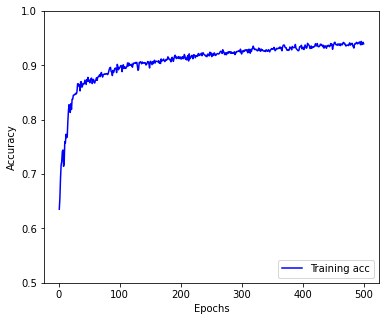

In [77]:
plt.figure(figsize=(6,5))
plt.plot(epochs, acc, label='Training acc', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [78]:
pred_test = model.predict_classes(dataX_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [79]:
test_loss, test_acc = model.evaluate(dataX_test, Y_test)

87/87 [==============================] - 0s 2ms/step - loss: 0.7312 - accuracy: 0.8606


In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_test)
print(cm)

[[1930  306]
 [  79  446]]


In [81]:
Y_test.value_counts()

0    2236
1     525
Name: Target, dtype: int64